In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os

Task1: Merge 12 months of sales into a single CSV file

In [8]:

files = [file for file in os.listdir(r'C:\Users\Amine\Desktop\Python Projects\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data')]

all_data = pd.DataFrame()
for file in files:
    sales = pd.read_csv(r"C:\Users\Amine\Desktop\Python Projects\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data/"+file)
    all_data=pd.concat([all_data, sales])

all_data.to_csv('all_data.csv', index=False)

In [9]:
 sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001"
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301"
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001"
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101"
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301"


In [10]:
sales.shape

(11686, 6)

In [11]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


Clean up the data

1. Drop rowns of Nan

In [15]:
nan_df= all_data[all_data.isna().any(axis=1)]
nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
all_data= all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


Question1=What was the best month for sales? How much was earned?

---- Task (1) =Add additional columns

####find 'or' and delete it

In [19]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [20]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head

<bound method NDFrame.head of        Order ID                     Product Quantity Ordered Price Each  \
0        176558        USB-C Charging Cable                2      11.95   
2        176559  Bose SoundSport Headphones                1      99.99   
3        176560                Google Phone                1        600   
4        176560            Wired Headphones                1      11.99   
5        176561            Wired Headphones                1      11.99   
...         ...                         ...              ...        ...   
186845   259353      AAA Batteries (4-pack)                3       2.99   
186846   259354                      iPhone                1        700   
186847   259355                      iPhone                1        700   
186848   259356      34in Ultrawide Monitor                1     379.99   
186849   259357        USB-C Charging Cable                1      11.95   

            Order Date                         Purchase Address  Mont

In [21]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [22]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month                int32
dtype: object

------Task (2): Add a sales column

In [23]:
#Convert columns to the correct type

In [24]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

In [25]:
all_data.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int32
dtype: object

In [26]:
#Calculate Sales

In [34]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Month,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,23.90,4,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,99.99,4,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,600.00,4,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,11.99,4,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,11.99,4,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


Answer to the question: What was the best month for sales? How much was earned?

In [36]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Month,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,23.90,4,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,99.99,4,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,600.00,4,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,11.99,4,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,11.99,4,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [42]:
monthly_sales = all_data.groupby('Month').sum()['Sales']
monthly_sales

Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Sales, dtype: float64

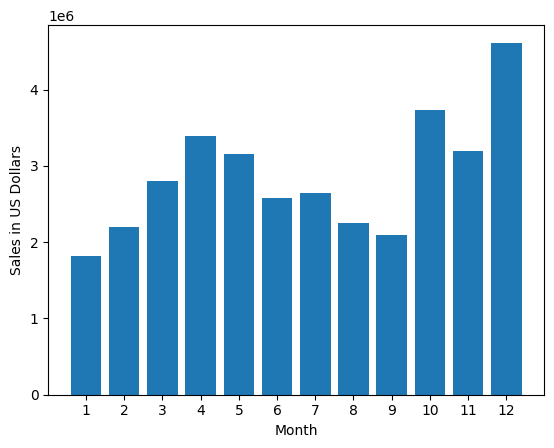

In [44]:
months = range(1,13)
plt.bar(months, monthly_sales)
plt.xticks(months)
plt.ylabel('Sales in US Dollars')
plt.xlabel('Month')
plt.show()

Question 2: What city had the highest number of sales?

-----Task 1: Add a city column

In [58]:
all_data['City'] = all_data['Purchase Address'].str.split(',').str[1:].str.join(' ').str.strip()

In [59]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Month,Order Date,Purchase Address,City
0,176558,USB-C Charging Cable,2,11.95,23.90,4,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Dallas TX 75001
2,176559,Bose SoundSport Headphones,1,99.99,99.99,4,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Boston MA 02215
3,176560,Google Phone,1,600.00,600.00,4,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Los Angeles CA 90001
4,176560,Wired Headphones,1,11.99,11.99,4,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Los Angeles CA 90001
5,176561,Wired Headphones,1,11.99,11.99,4,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",Los Angeles CA 90001


In [70]:
high_sales = all_data.groupby('City').sum()
high_sales

,Order ID,Product,Quantity Ordered,Price Each,Sales,Month,Order Date,Purchase Address
City,,,,,,,,
Atlanta GA 30301,1765641765711765821765891766231766271766341766...,USB-C Charging CableLightning Charging CableBo...,16602,2779908.20,2795498.58,104794,04/12/19 10:5804/19/19 14:2904/27/19 12:2004/0...,"790 Ridge St, Atlanta, GA 30301253 Johnson St,..."
Austin TX 73301,1765911766091766741766771766861767011767051767...,Apple Airpods HeadphonesApple Airpods Headphon...,11153,1809873.61,1819581.75,69829,04/21/19 07:2104/11/19 16:5904/20/19 20:5304/0...,"600 Maple St, Austin, TX 73301267 11th St, Aus..."
Boston MA 02215,1765591765661765781765811765851765851766001766...,Bose SoundSport HeadphonesWired HeadphonesAppl...,22528,3637409.77,3661642.01,141112,04/07/19 22:3004/08/19 14:0504/09/19 23:3504/0...,"682 Chestnut St, Boston, MA 0221583 7th St, Bo..."
Dallas TX 75001,1765581765691765701765771765961766021766101766...,USB-C Charging Cable27in 4K Gaming MonitorAA B...,16730,2752627.82,2767975.40,104620,04/19/19 08:4604/16/19 19:2304/22/19 15:0904/0...,"917 1st St, Dallas, TX 75001657 Hill St, Dalla..."
Los Angeles CA 90001,1765601765601765611765671765741765741765761765...,Google PhoneWired HeadphonesWired HeadphonesGo...,33289,5421435.23,5452570.80,208325,04/12/19 14:3804/12/19 14:3804/30/19 09:2704/1...,"669 Spruce St, Los Angeles, CA 90001669 Spruce..."
New York City NY 10001,1765721765751765791765901765991766131766371766...,Apple Airpods HeadphonesAAA Batteries (4-pack)...,27932,4635370.83,4664317.43,175741,04/04/19 20:3004/27/19 00:3004/11/19 10:2304/1...,"149 Dogwood St, New York City, NY 10001433 Hil..."
Portland ME 04101,1767731768791769091770721772301772331772991773...,AAA Batteries (4-pack)Flatscreen TVWired Headp...,2750,447189.25,449758.27,17144,04/25/19 20:0704/13/19 14:1504/22/19 09:5304/0...,"30 9th St, Portland, ME 04101370 Sunset St, Po..."
Portland OR 97035,1765831765931766171766421766461766481766621767...,AAA Batteries (4-pack)Lightning Charging Cable...,11303,1860558.22,1870732.34,70621,04/20/19 12:0004/15/19 13:4504/25/19 08:0304/1...,"146 Jackson St, Portland, OR 97035906 7th St, ..."
San Francisco CA 94016,1765621765651765731765841765861765861765941765...,USB-C Charging CableMacbook Pro LaptopUSB-C Ch...,50239,8211461.74,8262203.91,315520,04/29/19 13:0304/24/19 10:3804/27/19 18:4104/2...,"381 Wilson St, San Francisco, CA 94016915 Will..."


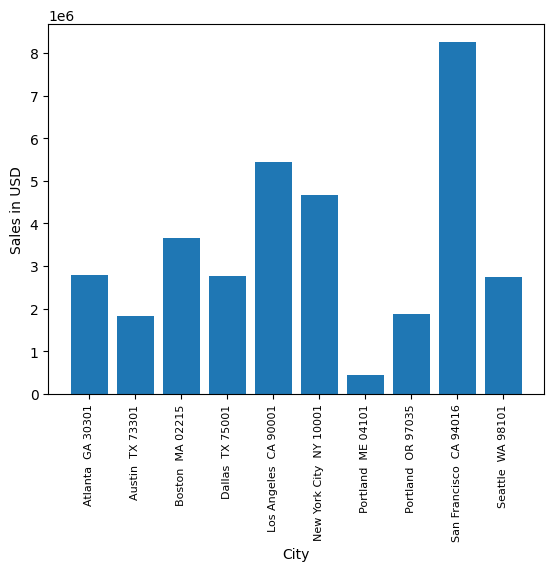

In [71]:

cities = [city for city, df in all_data.groupby('City')]
plt.bar(cities, high_sales['Sales'])
plt.xticks(cities, rotation='vertical', size=8)
plt.ylabel('Sales in USD')
plt.xlabel('City')
plt.show()

Question 3: What time is the best to display ads that will get us new cutomers?

In [72]:
all_data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Sales,Month,Order Date,Purchase Address,City
0,176558,USB-C Charging Cable,2,11.95,23.90,4,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Dallas TX 75001
2,176559,Bose SoundSport Headphones,1,99.99,99.99,4,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Boston MA 02215


In [78]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'], format='%m/%d/%y %H:%M')

In [79]:
print(all_data['Order Date'].dtype)

datetime64[ns]


In [82]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Month,Order Date,Purchase Address,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,23.90,4,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Dallas TX 75001,8,46
2,176559,Bose SoundSport Headphones,1,99.99,99.99,4,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",Boston MA 02215,22,30
3,176560,Google Phone,1,600.00,600.00,4,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles CA 90001,14,38
4,176560,Wired Headphones,1,11.99,11.99,4,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles CA 90001,14,38
5,176561,Wired Headphones,1,11.99,11.99,4,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",Los Angeles CA 90001,9,27


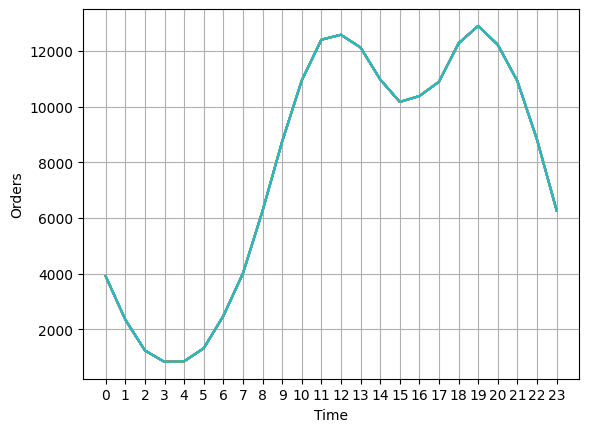

In [89]:
hours = [hour for hour, df in all_data.groupby('Hour')]
plt.plot(hours, all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.grid()
plt.xlabel('Time')
plt.ylabel('Orders')
plt.show()

Question 4: What products are most often sold together? 

In [90]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Month,Order Date,Purchase Address,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,23.90,4,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Dallas TX 75001,8,46
2,176559,Bose SoundSport Headphones,1,99.99,99.99,4,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",Boston MA 02215,22,30
3,176560,Google Phone,1,600.00,600.00,4,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles CA 90001,14,38
4,176560,Wired Headphones,1,11.99,11.99,4,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles CA 90001,14,38
5,176561,Wired Headphones,1,11.99,11.99,4,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",Los Angeles CA 90001,9,27


-----Task1 : Find products with the same Order ID

In [91]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]
df.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Sales,Month,Order Date,Purchase Address,City,Hour,Minute
3,176560,Google Phone,1,600.00,600.00,4,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles CA 90001,14,38
4,176560,Wired Headphones,1,11.99,11.99,4,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles CA 90001,14,38
18,176574,Google Phone,1,600.00,600.00,4,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",Los Angeles CA 90001,19,42
19,176574,USB-C Charging Cable,1,11.95,11.95,4,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",Los Angeles CA 90001,19,42
30,176585,Bose SoundSport Headphones,1,99.99,99.99,4,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",Boston MA 02215,11,31
31,176585,Bose SoundSport Headphones,1,99.99,99.99,4,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",Boston MA 02215,11,31
32,176586,AAA Batteries (4-pack),2,2.99,5.98,4,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",San Francisco CA 94016,17,0
33,176586,Google Phone,1,600.00,600.00,4,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",San Francisco CA 94016,17,0
119,176672,Lightning Charging Cable,1,14.95,14.95,4,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",New York City NY 10001,11,7
120,176672,USB-C Charging Cable,1,11.95,11.95,4,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",New York City NY 10001,11,7


-----Task 2: Create a new column called 'Grouped' which contains the products sold together

In [93]:
df['Grouped'] =  df.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))
df.head()

C:\Users\Amine\AppData\Local\Temp\ipykernel_43260\1290815262.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] =  df.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Sales,Month,Order Date,Purchase Address,City,Hour,Minute,Grouped
3,176560,Google Phone,1,600.00,600.00,4,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles CA 90001,14,38,"Google Phone, Wired Headphones"
4,176560,Wired Headphones,1,11.99,11.99,4,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles CA 90001,14,38,"Google Phone, Wired Headphones"
18,176574,Google Phone,1,600.00,600.00,4,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",Los Angeles CA 90001,19,42,"Google Phone, USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,11.95,4,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",Los Angeles CA 90001,19,42,"Google Phone, USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,99.99,4,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",Boston MA 02215,11,31,"Bose SoundSport Headphones, Bose SoundSport He..."


In [94]:
df = df[['Order ID', 'Grouped']].drop_duplicates()
df.head()

,Order ID,Grouped
3,176560,"Google Phone, Wired Headphones"
18,176574,"Google Phone, USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones, Bose SoundSport He..."
32,176586,"AAA Batteries (4-pack), Google Phone"
119,176672,"Lightning Charging Cable, USB-C Charging Cable"


----Task 3: Find the pairs that occur together most frequently

In [95]:
from itertools import combinations
from collections import Counter

In [96]:
count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

count.most_common(10)

[(('iPhone', ' Lightning Charging Cable'), 1005),
 (('Google Phone', ' USB-C Charging Cable'), 987),
 (('iPhone', ' Wired Headphones'), 447),
 (('Google Phone', ' Wired Headphones'), 414),
 (('Vareebadd Phone', ' USB-C Charging Cable'), 361),
 (('iPhone', ' Apple Airpods Headphones'), 360),
 (('Google Phone', ' Bose SoundSport Headphones'), 220),
 (('Vareebadd Phone', ' Wired Headphones'), 143),
 ((' USB-C Charging Cable', ' Wired Headphones'), 120),
 (('Vareebadd Phone', ' Bose SoundSport Headphones'), 80)]

Question 5: What product sold the most? Why do you think it was sold the most?

In [97]:
all_data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Sales,Month,Order Date,Purchase Address,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,23.90,4,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Dallas TX 75001,8,46
2,176559,Bose SoundSport Headphones,1,99.99,99.99,4,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",Boston MA 02215,22,30


In [102]:
all_data['Order Date'] = pd.to_numeric(all_data['Order Date'])
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

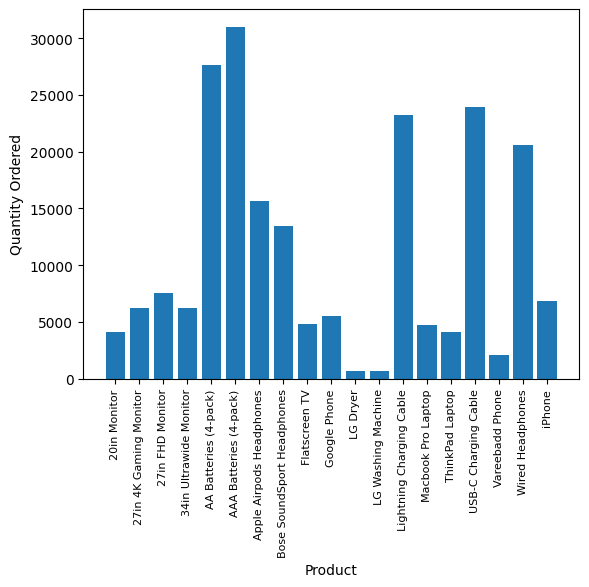

In [106]:
products = [product for product, df in product_group]
plt.bar(products, quantity_ordered)
plt.xticks(products, rotation='vertical', size=8)
plt.ylabel('Quantity Ordered')
plt.xlabel('Product')

plt.show()

----Task: Overlay a second y-axis on existing chart to show the correlation between the Quantity ordered and the Price 

C:\Users\Amine\AppData\Local\Temp\ipykernel_43260\1366160440.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(products, rotation='vertical', size=8)


<function matplotlib.pyplot.show(close=None, block=None)>

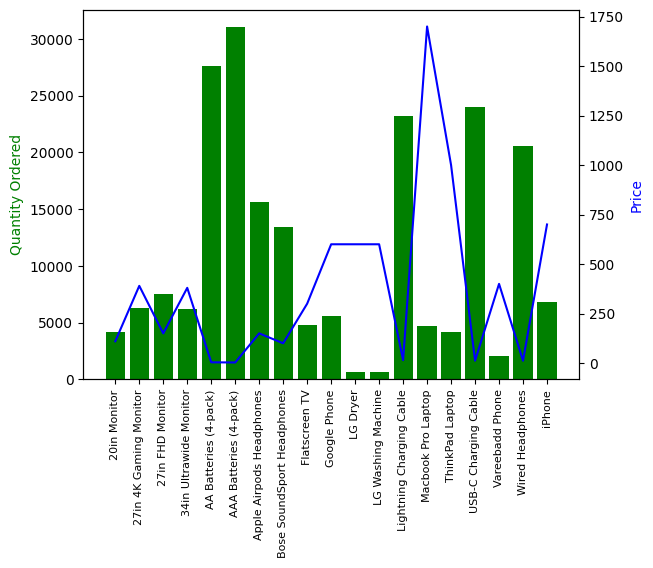

In [122]:
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'], errors='coerce')
nan_values = all_data['Price Each'].isna()
if nan_values.any():
    print(f"Warning: There are {nan_values.sum()} non-numeric values in 'Price Each' column.")

prices = all_data.groupby('Product')['Price Each'].mean()
fig, ax1 = plt.subplots()

ax2= ax1.twinx()
ax1.bar(products, quantity_ordered, color='g')
ax2.plot(products, prices, 'b-')

ax2.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price', color='b')
ax1.set_xticklabels(products, rotation='vertical', size=8)

plt.show